Analysis of SCWEAT Results

In [ ]:
from google.colab import drive
import os

  # gdrive_path='/content/gdrive/MyDrive/Bertopic/shared_work/'

  # # This will mount your google drive under 'MyDrive'
# drive.mount('/content/gdrive', force_remount=True)
# # In order to access the files in this notebook we have to navigate to the correct folder
# os.chdir(gdrive_path)
# dataset_path = ''
# # Check manually if all files are present
# print(sorted(os.listdir()))

# To run from the common drive:
dataset_path = '/content/drive/MyDrive/Praktikum - NLP Applications/Models/bertopic_concatenated_chunks_stratified'
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import seaborn as sns
import ast

In [ ]:
weat_dir = '/content/drive/MyDrive/Praktikum - NLP Applications/WEAT/'
weat_results = pd.read_csv(weat_dir + "weat_results.csv")

In [ ]:
weat_results.head()

,Unnamed: 0,genre,topic,target_set,effect_size,word_scores
0,0,NaN,nigga_niggas_bitch,Pleasant,-0.032685,"[{'target_word': 'friend', 'scweat_score': -0...."
1,1,NaN,nigga_niggas_bitch,Unpleasant,0.257177,"[{'target_word': 'terrible', 'scweat_score': 0..."
2,2,NaN,nigga_niggas_bitch,Appearance words,-0.270124,"[{'target_word': 'sensual', 'scweat_score': -0..."
3,3,NaN,nigga_niggas_bitch,Intelligence words,1.326002,"[{'target_word': 'intelligent', 'scweat_score'..."
4,4,NaN,nigga_niggas_bitch,Strenght words,0.811655,"[{'target_word': 'potent', 'scweat_score': 0.0..."


In [ ]:
weat_results.replace([np.inf, -np.inf], np.nan, inplace=True) # to ignore infinity score - happens because embeddings were not found, so division of zero ocurred

### General Analysis

In [ ]:
# Target set that tends towards male nouns - overall across topics

no_genre = weat_results[weat_results['genre'].isna()]
highest_male_target = no_genre['effect_size'].idxmax()
no_genre.iloc[highest_male_target]

Unnamed: 0                                                    21
genre                                                        NaN
topic                                          jesus_praise_lord
target_set                                    Intelligence words
effect_size                                             3.101484
word_scores    [{'target_word': 'brilliant', 'scweat_score': ...
Name: 21, dtype: object

In [ ]:
# Target set that tends towards female nouns - overall across topics

highest_female_target = no_genre['effect_size'].idxmin()
no_genre.iloc[highest_female_target]['target_set']

'Appearance words'

In [ ]:
# For each topic - no genre

def find_most_biased_target_sets(df, topic_name):
  # print(df.head())
  highest_male_target = df['effect_size'].idxmax()
  highest_female_target = df['effect_size'].idxmin()
  # print(highest_male_target, highest_female_target)

  result = {
      "topic": topic_name,
      "female_target_set": no_genre.iloc[highest_female_target]['target_set'],
      "female_effect_size": no_genre.iloc[highest_female_target]['effect_size'],
      "male_target_set": no_genre.iloc[highest_male_target]['target_set'],
      "male_effect_size": no_genre.iloc[highest_male_target]['effect_size'],
  }
  return result

most_biased_target_sets = []
for topic in no_genre['topic'].unique():
  df = no_genre[no_genre['topic'] == topic]
  most_biased_target_sets.append(find_most_biased_target_sets(df, topic))

In [ ]:
bertopic_results_dir = '/content/drive/MyDrive/Praktikum - NLP Applications/Models/bertopic_concatenated_chunks_stratified/'
topics_list = bertopic_results_dir + 'topics.json'
topics_with_dataset_path = '/results/topics_for_bias_analysis.csv'

with open(topics_list) as f:
    all_topics = json.load(f)
    print(all_topics)

{'topic_representations': {'-1': [['love', 0.0018117649441346617], ['im', 0.0017476162647132283], ['dont', 0.001724059774578046], ['just', 0.001701645764065447], ['know', 0.0016948785595154198], ['oh', 0.001681792482505376], ['baby', 0.0016369168293327537], ['youre', 0.001618058795805471], ['like', 0.0016104737196700515], ['yeah', 0.001564731320611983]], '0': [['nigga', 0.005668254592840408], ['niggas', 0.005440166100871997], ['bitch', 0.004096094991031708], ['shit', 0.003805092244781979], ['fuck', 0.0037382588560453383], ['em', 0.0026590152866240242], ['money', 0.002634112321645001], ['ass', 0.002598596041345901], ['bitches', 0.0025326330634300336], ['aint', 0.0024592409943047506]], '1': [['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['hol

In [ ]:
bertopic_results = pd.read_csv(bertopic_results_dir + topics_with_dataset_path)

In [ ]:
bertopic_results[['topic', 'topic_label']]

,topic,topic_label
0,7,mi_dem_yuh
1,0,nigga_niggas_bitch
2,434,bicyclette_ma bicyclette_bicyclette ma
3,434,bicyclette_ma bicyclette_bicyclette ma
4,398,dog status_movin rank_status im
...,...,...
537548,1,jesus_praise_lord
537549,3,dance_funky_dance dance
537550,66,ra_viral_body body
537551,98,military time_military_time military


In [ ]:
topic_label_dictionary = bertopic_results.set_index('topic_label')['topic'].to_dict()
topic_label_dictionary

{'mi_dem_yuh': 7,
 'nigga_niggas_bitch': 0,
 'bicyclette_ma bicyclette_bicyclette ma': 434,
 'dog status_movin rank_status im': 398,
 'sideline ho_woke girl_candy lies': 485,
 'im stickin_stickin im_stickin': 272,
 'rich ass_money money_th law': 214,
 'did brooklyn_brooklyn_brooklyn did': 526,
 'ghetto_ghetto ghetto_im ghetto': 50,
 'country_hank_thats right': 94,
 'dorothy_dorothy parker_parker dorothy': 286,
 'military time_military_time military': 98,
 'em youre_worth em_ahahah': 261,
 'wanna holler_holler_holler throw': 357,
 'pills_pills pills_drugs': 90,
 'tut_tut tut_aes': 101,
 'fame fame_fame_famous': 257,
 'cars ride_wreck mic_mic wreck': 364,
 'ra_viral_body body': 66,
 'daddys_daddys girl_barely sleep': 148,
 'man bride_bride man_try use': 169,
 'better hands_witness_witness witness': 67,
 'police_dont trouble_murder': 91,
 'diamond joe_joe_diamond': 210,
 'comea_stereotype_help wait': 86,
 'body_girl_baby': 2,
 'tangled blue_got shaft_tangled': 529,
 'say byebye_byebye say

In [ ]:
most_biased_target_sets

[{'topic': 'nigga_niggas_bitch',
  'female_target_set': 'Appearance words',
  'female_effect_size': -0.2701241075992584,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.3260016441345217},
 {'topic': 'body_girl_baby',
  'female_target_set': 'Pleasant',
  'female_effect_size': 0.1181847155094146,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.2712458372116089},
 {'topic': 'tears_heart_wish',
  'female_target_set': 'Appearance words',
  'female_effect_size': -0.4641258716583252,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.84377920627594},
 {'topic': 'jesus_praise_lord',
  'female_target_set': 'Appearance words',
  'female_effect_size': -1.1821433305740356,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 3.1014842987060547},
 {'topic': 'heartache_bah_bah bah',
  'female_target_set': 'Weakness words',
  'female_effect_size': -0.4851242005825043,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 0.7

In [ ]:
# What are the most biased target set and topic pairs in each genre?

def find_most_biased_target_sets_genre(df, genre):
  # print(df.head())
  try:
    highest_male_target = df['effect_size'].idxmax()
    highest_female_target = df['effect_size'].idxmin()

  except Exception as e:
    print(genre)
    print(e)
  # print(highest_male_target, highest_female_target)

  result = {
      "genre": genre,
      "female_most_biased_topic": weat_results.iloc[highest_female_target]['topic'],
      "female_target_set": weat_results.iloc[highest_female_target]['target_set'],
      "female_effect_size": weat_results.iloc[highest_female_target]['effect_size'],
      "male_most_biased_topic": weat_results.iloc[highest_male_target]['topic'],
      "male_target_set": weat_results.iloc[highest_male_target]['target_set'],
      "male_effect_size": weat_results.iloc[highest_male_target]['effect_size'],
  }
  return result

weat_results.replace([np.inf, -np.inf], np.nan, inplace=True) # to ignore infinity score - happens because embeddings were not found, so division of zero ocurred
most_biased_genre = []

for genre in weat_results['genre'].unique():
  try:
    np.isnan(genre)
    # print("true")
    genre = 'None'
    df = weat_results[weat_results['genre'].isna()]
  except Exception as e:
    df = weat_results[weat_results['genre'] == genre]

  most_biased_genre.append(find_most_biased_target_sets_genre(df, genre))

In [ ]:
most_biased_genre = pd.DataFrame(most_biased_genre)
most_biased_genre.head()

,genre,female_most_biased_topic,female_target_set,female_effect_size,male_most_biased_topic,male_target_set,male_effect_size
0,None,jesus_praise_lord,Appearance words,-1.182143,jesus_praise_lord,Intelligence words,3.101484
1,country,country_hank_thats right,Weakness words,-10.359133,beautiful beautiful_na_beautiful,Unpleasant,2.834482
2,pop,like home_need somebody_home feels,Intelligence words,-6.752063,dance_funky_dance dance,Intelligence words,4.260015
3,rap,tut_tut tut_aes,Pleasant,-0.862442,body_girl_baby,Intelligence words,3.194906
4,rb,comea_stereotype_help wait,Strenght words,-16.899729,ra_viral_body body,Intelligence words,5.138088


The above table shows the topic and target set pair that are most male and female biased for each gender respectively. In country and rb genres, (country_hank_thats right,	Weakness words) and (comea_stereotype_help wait, Strenght words) are very female biased with high effect sizes.

For male attributes, (pop, dance_funky_dance dance, Intelligence words) and (rb, ra_viral_body body, Intelligence words) triplets show high male bias.

In [ ]:
# subset = most_biased_genre[['genre', 'female_effect_size', 'male_effect_size']]

topic_representations = all_topics['topic_representations']
type(topic_representations)

dict

In [ ]:
subset = most_biased_genre[['genre', 'female_effect_size', 'male_effect_size']]
subset = subset.rename(columns = {'female_effect_size': 'female', 'male_effect_size': 'male'})
subset['female'] = subset['female'].apply(lambda x: abs(x)) # to consider only magnitude
subset.set_index('genre')

,female,male
genre,,
None,1.182143,3.101484
country,10.359133,2.834482
pop,6.752063,4.260015
rap,0.862442,3.194906
rb,16.899729,5.138088
rock,26.897680,4.070564


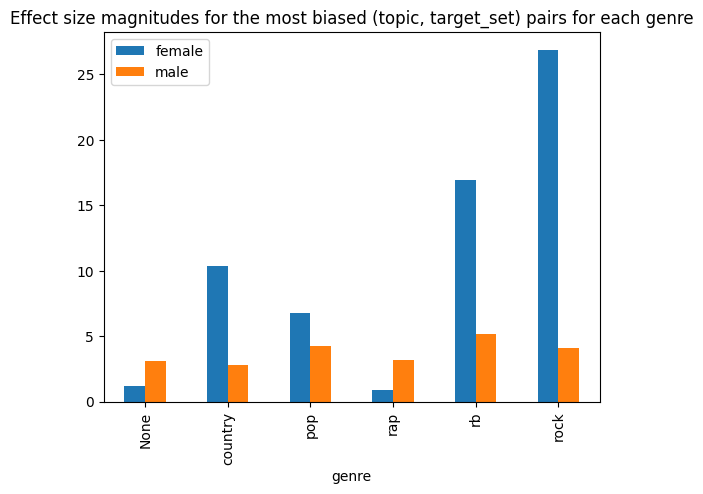

In [ ]:
subset.plot(kind='bar')
plt.title("Effect size magnitudes for the most biased (topic, target_set) pairs for each genre")
plt.xlabel('genre')
plt.xticks(ticks = [0,1,2,3,4,5], labels = subset['genre'])
plt.show()

# sns.barplot(data=subset)

**Disclaimer: The bars represent the (topic, target_set) pairs having the highest effect size for female and male for each gender**

In [ ]:
df = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])

df = df.pivot("column", "group", "val")
df.head()

<ipython-input-19-3507b6e6a5c4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot("column", "group", "val")


group,g1,g2
column,,
c1,10,8
c2,12,10
c3,13,12


In [ ]:
# What kind of bias does each target set have, overall vs genre?? => for each genre, for each target set, calculate avg effect size over topics

target_set_avgbias = []
target_sets = weat_results['target_set'].unique()

for genre in weat_results['genre'].unique():
  try:
    np.isnan(genre)
    genre = 'none'
    df = weat_results[weat_results['genre'].isna()]
  except Exception as e:
    df = weat_results[weat_results['genre'] == genre]
    # df = df.dropna()

  for target in target_sets:
    avg_score = df[df['target_set'] == target]['effect_size'].mean()

    target_set_avgbias.append({
        'genre': genre,
        'target_set': target,
        'avg_bias': avg_score
    })

target_set_avgbias = pd.DataFrame(target_set_avgbias)
target_set_avgbias

,genre,target_set,avg_bias
0,none,Pleasant,0.006932
1,none,Unpleasant,0.162219
2,none,Appearance words,-0.267063
3,none,Intelligence words,1.272430
4,none,Strenght words,0.341188
5,none,Weakness words,-0.310437
6,country,Pleasant,0.120228
7,country,Unpleasant,-0.932404
8,country,Appearance words,-0.225237
9,country,Intelligence words,-0.209962


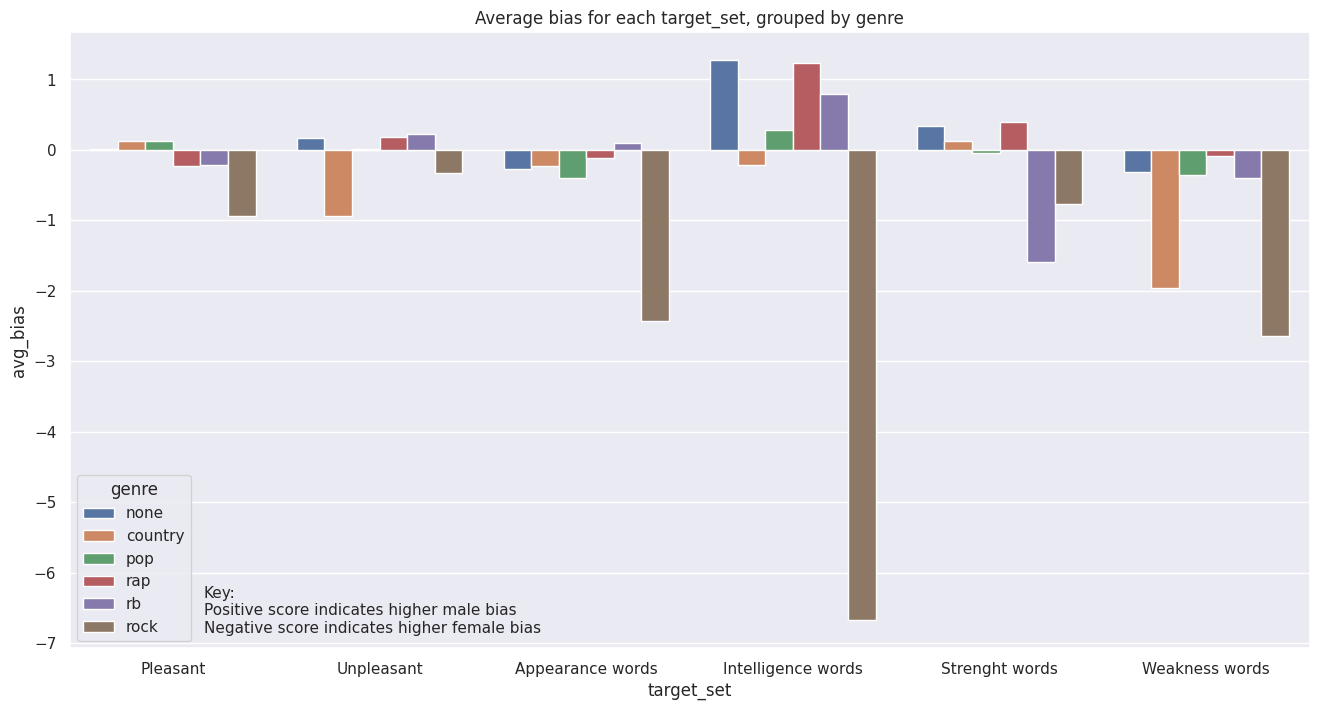

In [ ]:
# plt.figure(figsize=(8,10))

# # plt = target_set_avgbias.pivot("target_set","genre","avg_bias").plot(kind='bar')
# plt.show()
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(data=target_set_avgbias, x='target_set', y='avg_bias', hue='genre').set(title="Average bias for each target_set, grouped by genre")
plt.text(0.15, -6.85, "Key:\nPositive score indicates higher male bias\nNegative score indicates higher female bias", fontsize=11)
plt.show()
# plt.show()

Appearance and Weakness words tend to be more female biased on average for all genres, whereas Intelligence words are more male biased (except in rock, where they are extremely female biased - why???)


All target sets are female biased on average in rock.

In [ ]:
weat_dir
targetset_dict = pd.read_csv(weat_dir + 'betti2023_weat_wordsets.csv')

In [ ]:
wordsets = targetset_dict[targetset_dict['set_name'].isin(['Weakness words', 'Strenght words', 'Intelligence words', 'Appearance words', 'Pleasant', 'Unpleasant'])]


In [ ]:
wordsets

,set_name,words
1,Appearance words,"['sensual', 'thin', 'handsome', 'feeble', 'bal..."
10,Intelligence words,"['intelligent', 'venerable', 'adaptable', 'ref..."
15,Pleasant,"['friend', 'joy', 'wonderful', 'vacation', 'lo..."
17,Strenght words,"['potent', 'bold', 'leader', 'strong', 'triump..."
18,Unpleasant,"['terrible', 'prison', 'divorce', 'war', 'pove..."
19,Weakness words,"['wispy', 'loser', 'failure', 'timid', 'lose',..."


### Topic Wise Analysis

In [ ]:
most_biased_genre

,genre,female_most_biased_topic,female_target_set,female_effect_size,male_most_biased_topic,male_target_set,male_effect_size
0,None,jesus_praise_lord,Appearance words,-1.182143,jesus_praise_lord,Intelligence words,3.101484
1,country,country_hank_thats right,Weakness words,-10.359133,beautiful beautiful_na_beautiful,Unpleasant,2.834482
2,pop,like home_need somebody_home feels,Intelligence words,-6.752063,dance_funky_dance dance,Intelligence words,4.260015
3,rap,tut_tut tut_aes,Pleasant,-0.862442,body_girl_baby,Intelligence words,3.194906
4,rb,comea_stereotype_help wait,Strenght words,-16.899729,ra_viral_body body,Intelligence words,5.138088
5,rock,black gold_gold black_gold,Intelligence words,-26.897680,heartache_bah_bah bah,Strenght words,4.070564


In [ ]:
# For genre: none

df_nogenre = most_biased_genre[most_biased_genre['genre'] == 'None']
# print(df_nogenre['female_most_biased_topic'][0])
female_topic_id = topic_label_dictionary[df_nogenre['female_most_biased_topic'][0]]
female_target_set = df_nogenre['female_target_set'][0]
female_topic_rep = topic_representations[str(female_topic_id)]
female_wordsets = wordsets[wordsets['set_name'] == female_target_set]['words'].tolist()
female_scores = weat_results[weat_results['genre'].isna()] \
                [weat_results['topic'] == df_nogenre['female_most_biased_topic'][0]] \
                [weat_results['target_set'] == female_target_set]['word_scores'].values

print("Most Female Biased")
print("Topic:", df_nogenre['female_most_biased_topic'][0])
print("Topic words:", female_topic_rep)
print("Target set:", female_target_set)
print("Target set words:", female_scores)
print("------------------------\n\n")

df_nogenre = most_biased_genre[most_biased_genre['genre'] == 'None']
# print(df_nogenre['female_most_biased_topic'][0])
male_topic_id = topic_label_dictionary[df_nogenre['male_most_biased_topic'][0]]
male_target_set = df_nogenre['male_target_set'][0]
male_topic_rep = topic_representations[str(male_topic_id)]
male_wordsets = wordsets[wordsets['set_name'] == male_target_set]['words'].tolist()
male_scores = weat_results[weat_results['genre'].isna()] \
                [weat_results['topic'] == df_nogenre['male_most_biased_topic'][0]] \
                [weat_results['target_set'] == male_target_set]['word_scores'].values

print("Most Male Biased")
print("Topic:", df_nogenre['male_most_biased_topic'][0])
print("Topic words:", male_topic_rep)
print("Target set:", male_target_set)
print("Target set words:", male_scores)

Most Female Biased
Topic: jesus_praise_lord
Topic words: [['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['holy holy', 0.008313804908376412]]
Target set: Appearance words
Target set words: ["[{'target_word': 'thin', 'scweat_score': -0.20162605}, {'target_word': 'feeble', 'scweat_score': -0.17532282}, {'target_word': 'pretty', 'scweat_score': -0.1773113}, {'target_word': 'strong', 'scweat_score': 0.063703224}, {'target_word': 'weak', 'scweat_score': -0.0019626468}, {'target_word': 'ugly', 'scweat_score': -0.12924235}, {'target_word': 'stout', 'scweat_score': -0.07406789}, {'target_word': 'beautiful', 'scweat_score': -0.12719625}]"]
------------------------


Most Male Biased
Topic: jesus_praise_lord
Topic words: [['jesus', 0.02252736906258284

<ipython-input-27-7c95da86ef4e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'].isna()] \
<ipython-input-27-7c95da86ef4e>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'].isna()] \


In [ ]:
def analyse_most_biased(genre):
  df_genre = most_biased_genre[most_biased_genre['genre'] == genre]
  # print(df_nogenre['female_most_biased_topic'][0])
  female_topic_id = topic_label_dictionary[df_genre['female_most_biased_topic'].values[0]]
  female_target_set = df_genre['female_target_set'].values[0]
  female_topic_rep = topic_representations[str(female_topic_id)]
  female_wordsets = wordsets[wordsets['set_name'] == female_target_set]['words'].tolist()
  female_scores = weat_results[weat_results['genre'] == genre] \
                  [weat_results['topic'] == df_genre['female_most_biased_topic'].values[0]] \
                  [weat_results['target_set'] == female_target_set]['word_scores'].values

  print("Most Female Biased")
  print("Topic:", df_genre['female_most_biased_topic'].values[0])
  print("Topic words:", female_topic_rep)
  print("Target set:", female_target_set)
  print("Target set words:", female_scores)
  print("------------------------\n\n")

  # df_nogenre = most_biased_genre[most_biased_genre['genre'] == genre]
  # print(df_nogenre['female_most_biased_topic'][0])
  male_topic_id = topic_label_dictionary[df_genre['male_most_biased_topic'].values[0]]
  male_target_set = df_genre['male_target_set'].values[0]
  male_topic_rep = topic_representations[str(male_topic_id)]
  male_wordsets = wordsets[wordsets['set_name'] == male_target_set]['words'].tolist()
  male_scores = weat_results[weat_results['genre'] == genre] \
                  [weat_results['topic'] == df_genre['male_most_biased_topic'].values[0]] \
                  [weat_results['target_set'] == male_target_set]['word_scores'].values

  print("Most Male Biased")
  print("Topic:", df_genre['male_most_biased_topic'].values[0])
  print("Topic words:", male_topic_rep)
  print("Target set:", male_target_set)
  print("Target set words:", male_scores)

In [ ]:
# For genre: rock

analyse_most_biased('rock')

Most Female Biased
Topic: black gold_gold black_gold
Topic words: [['black gold', 0.04520978699880565], ['gold black', 0.03867463415690432], ['gold', 0.01972697505842507], ['built civilization', 0.013043861108762296], ['demons hide', 0.012821794565662705], ['men built', 0.012721645112874453], ['black', 0.01269815281447729], ['demons', 0.012671164796674027], ['devil', 0.012653068464770786], ['powerful men', 0.01245498069661852]]
Target set: Intelligence words
Target set words: ["[{'target_word': 'genius', 'scweat_score': -0.14354724}, {'target_word': 'wise', 'scweat_score': -0.13325626}]"]
------------------------


Most Male Biased
Topic: heartache_bah_bah bah
Topic words: [['heartache', 0.008948736591656225], ['bah', 0.008940267071088153], ['bah bah', 0.007865923664628533], ['youre bringin', 0.007537667466585974], ['bringin', 0.007494121841372905], ['just gimme', 0.007317355085374447], ['gimme love', 0.0071699038768987386], ['different songs', 0.006210554818187867], ['trouble', 0.0061

<ipython-input-28-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-28-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('country')

Most Female Biased
Topic: country_hank_thats right
Topic words: [['country', 0.013441296206208162], ['hank', 0.010803799489115527], ['thats right', 0.009356396730151728], ['country stuff', 0.009150636245592892], ['east bound', 0.009052697342184644], ['rockin seen', 0.008679704873476031], ['shufflin til', 0.008679704873476031], ['seen scufflin', 0.008679704873476031], ['tires', 0.008647148316658271], ['scufflin shufflin', 0.008607828513955697]]
Target set: Weakness words
Target set words: ["[{'target_word': 'lose', 'scweat_score': -0.12837332}, {'target_word': 'shy', 'scweat_score': -0.15182057}, {'target_word': 'afraid', 'scweat_score': -0.1624729}]"]
------------------------


Most Male Biased
Topic: beautiful beautiful_na_beautiful
Topic words: [['beautiful beautiful', 0.017065553809577087], ['na', 0.010783833207575332], ['beautiful', 0.010717081090640238], ['oh rain', 0.010640023439060434], ['pillow hold', 0.00948687723472354], ['soft window', 0.00948687723472354], ['beautiful boy',

<ipython-input-28-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-28-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('rb')

Most Female Biased
Topic: comea_stereotype_help wait
Topic words: [['comea', 0.012257626476657462], ['stereotype', 0.011707594895741509], ['help wait', 0.011246460741517137], ['change', 0.010931768543348777], ['need change', 0.010099705864875862], ['comea comea', 0.010048207014224288], ['make change', 0.009619883731219707], ['oh oh', 0.009438284898735815], ['girl', 0.008834301077058689], ['change mind', 0.008625706215389313]]
Target set: Strenght words
Target set words: ["[{'target_word': 'strong', 'scweat_score': -0.13546509}, {'target_word': 'loud', 'scweat_score': -0.15250501}]"]
------------------------


Most Male Biased
Topic: ra_viral_body body
Topic words: [['ra', 0.009990627656621264], ['viral', 0.009643141650171246], ['body body', 0.00959031709786138], ['fuckin girl', 0.008640509612016616], ['wild nigga', 0.007825013513118909], ['nigga', 0.007675035081808858], ['ra ra', 0.0074820278979064745], ['girl', 0.007117157898914556], ['babygirl im', 0.007099701391315031], ['nigga time

<ipython-input-28-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-28-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('pop')

Most Female Biased
Topic: like home_need somebody_home feels
Topic words: [['like home', 0.017120842018088583], ['need somebody', 0.015928053693698537], ['home feels', 0.014974677620848705], ['youre wolf', 0.013736194112801109], ['id blind', 0.013166158997786333], ['somebody knows', 0.01301947243005409], ['feels like', 0.01225617242518537], ['la la', 0.011354932671318015], ['uh uh', 0.010929464665169482], ['alright ok', 0.010902974730077968]]
Target set: Intelligence words
Target set words: ["[{'target_word': 'smart', 'scweat_score': -0.035890102}, {'target_word': 'wise', 'scweat_score': -0.04836914}]"]
------------------------


Most Male Biased
Topic: dance_funky_dance dance
Topic words: [['dance', 0.02424273550499015], ['funky', 0.011537877828894328], ['dance dance', 0.011220842386088592], ['funk', 0.010369436273927694], ['shake', 0.008681933925226896], ['groove', 0.0083696969709621], ['dancing', 0.00751404208394358], ['boogie', 0.006915248540118712], ['party', 0.006711708232563876]

<ipython-input-28-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-28-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('rap')

Most Female Biased
Topic: tut_tut tut_aes
Topic words: [['tut', 0.01705709631068461], ['tut tut', 0.01286481916495697], ['aes', 0.01163880493352555], ['bloody right', 0.009233954619675248], ['sand rhymes', 0.008782645083291296], ['rhymes aes', 0.00832760003959547], ['aes rhymes', 0.00832760003959547], ['rhymes', 0.008205672333076713], ['right say', 0.005158910207515656], ['got bloody', 0.005095650799388127]]
Target set: Pleasant
Target set words: ["[{'target_word': 'friend', 'scweat_score': -0.07587737}, {'target_word': 'joy', 'scweat_score': -0.022278711}, {'target_word': 'wonderful', 'scweat_score': -0.03261596}, {'target_word': 'vacation', 'scweat_score': -0.05072008}, {'target_word': 'love', 'scweat_score': -0.0655797}, {'target_word': 'honest', 'scweat_score': 0.07329658}, {'target_word': 'honor', 'scweat_score': -0.12061365}, {'target_word': 'pleasure', 'scweat_score': -0.11909123}, {'target_word': 'loyal', 'scweat_score': 0.0014126077}, {'target_word': 'family', 'scweat_score': 

<ipython-input-28-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-28-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


### Analysis of most common topic by genre and their SCWEAT scores

In [ ]:
# analyse niggas_niggas_bitch for rap for all target sets
rap_most_popular = weat_results[(weat_results['genre'] == 'rap') & (weat_results['topic'] == 'nigga_niggas_bitch')]

In [ ]:
for index, row in rap_most_popular.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

Target Set: Pleasant
Effect Size: -0.001236954354681
Word Scores: [{'target_word': 'friend', 'scweat_score': -0.055000544}, {'target_word': 'joy', 'scweat_score': -0.07321535}, {'target_word': 'wonderful', 'scweat_score': -0.034480944}, {'target_word': 'vacation', 'scweat_score': -0.05655119}, {'target_word': 'love', 'scweat_score': -0.095483094}, {'target_word': 'honest', 'scweat_score': 0.06736509}, {'target_word': 'honor', 'scweat_score': 0.058757514}, {'target_word': 'pleasure', 'scweat_score': 0.06928676}, {'target_word': 'loyal', 'scweat_score': 0.01782264}, {'target_word': 'family', 'scweat_score': -0.026554823}, {'target_word': 'peace', 'scweat_score': 0.057721034}, {'target_word': 'heaven', 'scweat_score': 0.06536108}, {'target_word': 'cheer', 'scweat_score': -0.086969666}, {'target_word': 'freedom', 'scweat_score': 0.037568867}, {'target_word': 'diploma', 'scweat_score': 0.14677568}, {'target_word': 'gentle', 'scweat_score': -0.01836998}, {'target_word': 'happy', 'scweat_scor

All of the word scores for the words in the Intelligence target set have positive scores (i.e. are more closely associated to male attributes as opposed to female). In Appearance, we see that words like "thin", "fat", "plump", "slender", "ugly", "pretty" etc are female associated whereas words like "healthy", "athletic", "muscular" tend to be more male associated.

We see an overwhelmingly male association with the Strength words, in which the only word with a female association is "loud". However in the Weakness target set, words like "loser", "timid", "idiot" are male associated and words like "weakness", "shy", "surrender", "fragile" are more female associated.

Overall, 4/6 target sets are more closely associated to male attributes whereas only Pleasant words and Appearance words are more closely associated to female attributes.

Target Set: Pleasant
Effect Size: -0.2750464081764221
Word Scores: [{'target_word': 'friend', 'scweat_score': -0.0010239482}, {'target_word': 'joy', 'scweat_score': -0.07865313}, {'target_word': 'wonderful', 'scweat_score': -0.10572706}, {'target_word': 'vacation', 'scweat_score': -0.08178817}, {'target_word': 'love', 'scweat_score': -0.056733638}, {'target_word': 'honest', 'scweat_score': 0.029208925}, {'target_word': 'honor', 'scweat_score': 0.06651825}, {'target_word': 'pleasure', 'scweat_score': -0.063844346}, {'target_word': 'loyal', 'scweat_score': -0.019028377}, {'target_word': 'family', 'scweat_score': -0.088222}, {'target_word': 'peace', 'scweat_score': 0.08900593}, {'target_word': 'heaven', 'scweat_score': 0.1369006}, {'target_word': 'cheer', 'scweat_score': -0.08269742}, {'target_word': 'freedom', 'scweat_score': 0.08602251}, {'target_word': 'gentle', 'scweat_score': -0.025925346}, {'target_word': 'happy', 'scweat_score': -0.051376358}, {'target_word': 'paradise', 'scweat_sc

Text(-0.45, -0.77, 'Key:\nPositive score indicates higher male bias\nNegative score indicates higher female bias')

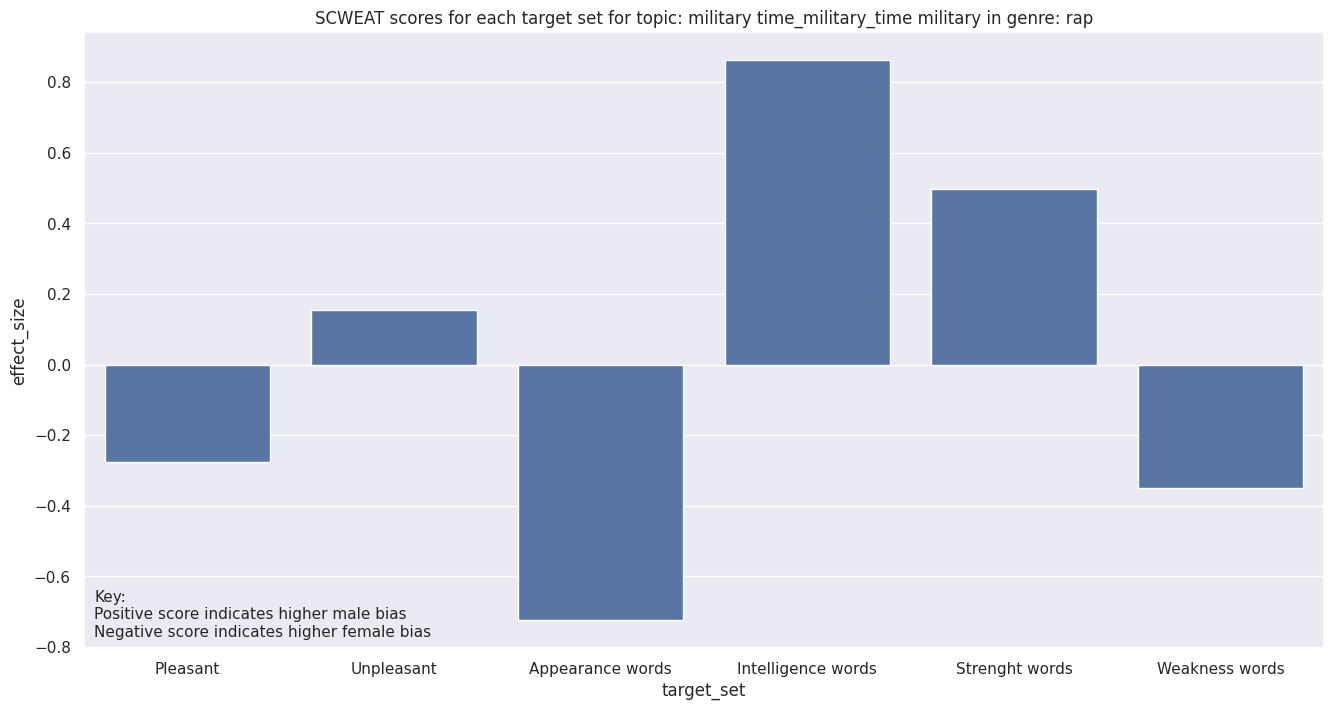

In [ ]:
# rap: military

# rap_most_popular2 = weat_results[(weat_results['genre'] == 'rap') & (weat_results['topic'] == 'military time_military_time military')]

# for index, row in rap_most_popular2.iterrows():
#   print("Target Set:", row['target_set'])
#   print("Effect Size:", row['effect_size'])
#   print("Word Scores:", row['word_scores'])
#   print("------------------\n\n")



# overall:	tears_heart_wish => include plot

mil = weat_results[(weat_results['genre'] == 'rap') & (weat_results['topic'] == 'military time_military_time military')]
mil_bar_chart = mil[['target_set', 'effect_size']]
mil_bar_chart.set_index('target_set')

for index, row in mil.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

# thw_bar_chart.plot(kind='bar')
# plt.title("Target set SCWEAT scores for topic: tears_heart_wish")
# plt.xlabel('target_set')
# plt.ylabel('effect_size')
# # plt.xticks(ticks = [12,13,14,15,16,17], labels = thw_bar_chart['target_set'])
# plt.show()

sns.barplot(data=mil_bar_chart, x='target_set', y='effect_size').set_title("SCWEAT scores for each target set for topic: military time_military_time military in genre: rap")
plt.text(-0.45, -0.77, "Key:\nPositive score indicates higher male bias\nNegative score indicates higher female bias", fontsize=11)

In [ ]:
# rock: ayy ayy_change_long sentiment

rock_most_popular = weat_results[(weat_results['genre'] == 'rock') & (weat_results['topic'] == 'ayy ayy_change_long sentiment')]

In [ ]:
for index, row in rock_most_popular.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

Target Set: Pleasant
Effect Size: 0.0703112930059433
Word Scores: [{'target_word': 'friend', 'scweat_score': 0.06913239}, {'target_word': 'joy', 'scweat_score': 0.07991737}, {'target_word': 'love', 'scweat_score': -0.17117934}, {'target_word': 'honest', 'scweat_score': 0.057971835}, {'target_word': 'pleasure', 'scweat_score': 0.033646166}, {'target_word': 'family', 'scweat_score': -0.023440003}, {'target_word': 'peace', 'scweat_score': 0.09693432}, {'target_word': 'heaven', 'scweat_score': -0.114209235}, {'target_word': 'freedom', 'scweat_score': -0.08478123}, {'target_word': 'gentle', 'scweat_score': -0.044381678}, {'target_word': 'happy', 'scweat_score': 0.044494182}, {'target_word': 'paradise', 'scweat_score': 0.003810823}, {'target_word': 'laughter', 'scweat_score': 0.07437289}, {'target_word': 'gift', 'scweat_score': 0.12728918}, {'target_word': 'health', 'scweat_score': -0.09783104}, {'target_word': 'lucky', 'scweat_score': 0.07025048}, {'target_word': 'miracle', 'scweat_score': 

In the most popular topic in rock, Intelligence words and Weakness words have a stronger association to female attributes as opposed to male. In Intelligence words, "clever" and "wise" are female biased, whereas "smart" is male biased. (not really interesting in terms of analysis??)
In Weakness words, "surrender", "follow", "afraid" contribute to the female bias while words like "loser", "failure" are still male biased => could this indicate that the expectation of success for males is higher than that for women?

In [ ]:
# rb:	body_girl_baby

rb_most_popular = weat_results[(weat_results['genre'] == 'rb') & (weat_results['topic'] == 'body_girl_baby')]

for index, row in rb_most_popular.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

Target Set: Pleasant
Effect Size: -0.0765631198883056
Word Scores: [{'target_word': 'friend', 'scweat_score': -0.024963707}, {'target_word': 'joy', 'scweat_score': 0.10194193}, {'target_word': 'wonderful', 'scweat_score': -0.19767804}, {'target_word': 'vacation', 'scweat_score': 0.014339581}, {'target_word': 'love', 'scweat_score': -0.08465741}, {'target_word': 'honest', 'scweat_score': -0.0067174584}, {'target_word': 'pleasure', 'scweat_score': 0.0022806525}, {'target_word': 'family', 'scweat_score': -0.05456224}, {'target_word': 'peace', 'scweat_score': 0.0018972903}, {'target_word': 'heaven', 'scweat_score': 0.036724903}, {'target_word': 'gentle', 'scweat_score': 0.0453185}, {'target_word': 'happy', 'scweat_score': 0.012619019}, {'target_word': 'paradise', 'scweat_score': -0.017221272}, {'target_word': 'diamond', 'scweat_score': 0.042936414}, {'target_word': 'gift', 'scweat_score': 0.03318858}, {'target_word': 'health', 'scweat_score': -0.017850101}, {'target_word': 'rainbow', 'scwe

In RB, 4/6 target sets are more female associated while both Strength and Weakness words have a male association, albeit the weak (pun intended) association of the latter.

In strength words, "loud", "shout" and "confident" are all female biased whereas the rest are male biased.

In Appearance, almost all words have a negative score except for "thin" and "handsome".


According to the R&B Hall of Fame, *R&B lyrical themes often encapsulate the African-American experience of pain and the quest for freedom and joy, as well as triumphs and failures in terms of relationships, economics, and aspirations*

In [ ]:
# pop:	jesus_praise_lord

pop_most_popular = weat_results[(weat_results['genre'] == 'pop') & (weat_results['topic'] == 'jesus_praise_lord')]

for index, row in pop_most_popular.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

Target Set: Pleasant
Effect Size: -0.1183921247720718
Word Scores: [{'target_word': 'friend', 'scweat_score': 0.07814178}, {'target_word': 'joy', 'scweat_score': 0.04238244}, {'target_word': 'wonderful', 'scweat_score': 0.123160705}, {'target_word': 'love', 'scweat_score': 0.071395874}, {'target_word': 'honest', 'scweat_score': -0.06641053}, {'target_word': 'honor', 'scweat_score': 0.11088991}, {'target_word': 'pleasure', 'scweat_score': 0.0071681663}, {'target_word': 'family', 'scweat_score': -0.13853216}, {'target_word': 'peace', 'scweat_score': 0.0890743}, {'target_word': 'heaven', 'scweat_score': -0.035794735}, {'target_word': 'cheer', 'scweat_score': -0.009604961}, {'target_word': 'freedom', 'scweat_score': -0.00035806}, {'target_word': 'gentle', 'scweat_score': -0.1352351}, {'target_word': 'happy', 'scweat_score': -0.11208938}, {'target_word': 'paradise', 'scweat_score': 0.05316536}, {'target_word': 'laughter', 'scweat_score': -0.11259012}, {'target_word': 'sunrise', 'scweat_scor

In pop, Appearance and Weakness have the highest female association, followed by Unpleasant and Pleasant, while Intelligence and Strength words are male associated.

In Unpleasant words, except for "tragedy", "death" and "hatred", the rest are female associated.

In [ ]:
# country:	tears_heart_wish

country_most_popular = weat_results[(weat_results['genre'] == 'country') & (weat_results['topic'] == 'tears_heart_wish')]

for index, row in country_most_popular.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

Target Set: Pleasant
Effect Size: -0.1169670298695564
Word Scores: [{'target_word': 'friend', 'scweat_score': -0.1525554}, {'target_word': 'joy', 'scweat_score': 0.043997526}, {'target_word': 'love', 'scweat_score': -0.2167765}, {'target_word': 'family', 'scweat_score': 0.062591136}, {'target_word': 'peace', 'scweat_score': 0.029594183}, {'target_word': 'heaven', 'scweat_score': 0.048696876}, {'target_word': 'freedom', 'scweat_score': -0.005769193}, {'target_word': 'happy', 'scweat_score': 0.09274468}]
------------------


Target Set: Unpleasant
Effect Size: -0.6344161629676819
Word Scores: [{'target_word': 'war', 'scweat_score': -0.04899448}, {'target_word': 'awful', 'scweat_score': 0.018347114}, {'target_word': 'kill', 'scweat_score': -0.37148964}, {'target_word': 'death', 'scweat_score': 0.00019198656}]
------------------


Target Set: Appearance words
Effect Size: -0.1177539005875587
Word Scores: [{'target_word': 'thin', 'scweat_score': 0.11696711}, {'target_word': 'pretty', 'scwea

Target Set: Pleasant
Effect Size: -0.2377492040395736
Word Scores: [{'target_word': 'friend', 'scweat_score': -0.09065959}, {'target_word': 'joy', 'scweat_score': -0.03954023}, {'target_word': 'wonderful', 'scweat_score': 0.06968549}, {'target_word': 'vacation', 'scweat_score': 0.053321764}, {'target_word': 'love', 'scweat_score': -0.22387382}, {'target_word': 'honest', 'scweat_score': 0.010158867}, {'target_word': 'honor', 'scweat_score': 0.014793306}, {'target_word': 'pleasure', 'scweat_score': -0.028646931}, {'target_word': 'loyal', 'scweat_score': 0.015883174}, {'target_word': 'family', 'scweat_score': -0.14136657}, {'target_word': 'peace', 'scweat_score': 0.03686802}, {'target_word': 'heaven', 'scweat_score': -0.035545766}, {'target_word': 'cheer', 'scweat_score': 0.039119408}, {'target_word': 'freedom', 'scweat_score': -0.021156609}, {'target_word': 'gentle', 'scweat_score': -0.049168617}, {'target_word': 'happy', 'scweat_score': -0.046524808}, {'target_word': 'paradise', 'scweat

Text(-0.45, -0.55, 'Key:\nPositive score indicates higher male bias\nNegative score indicates higher female bias')

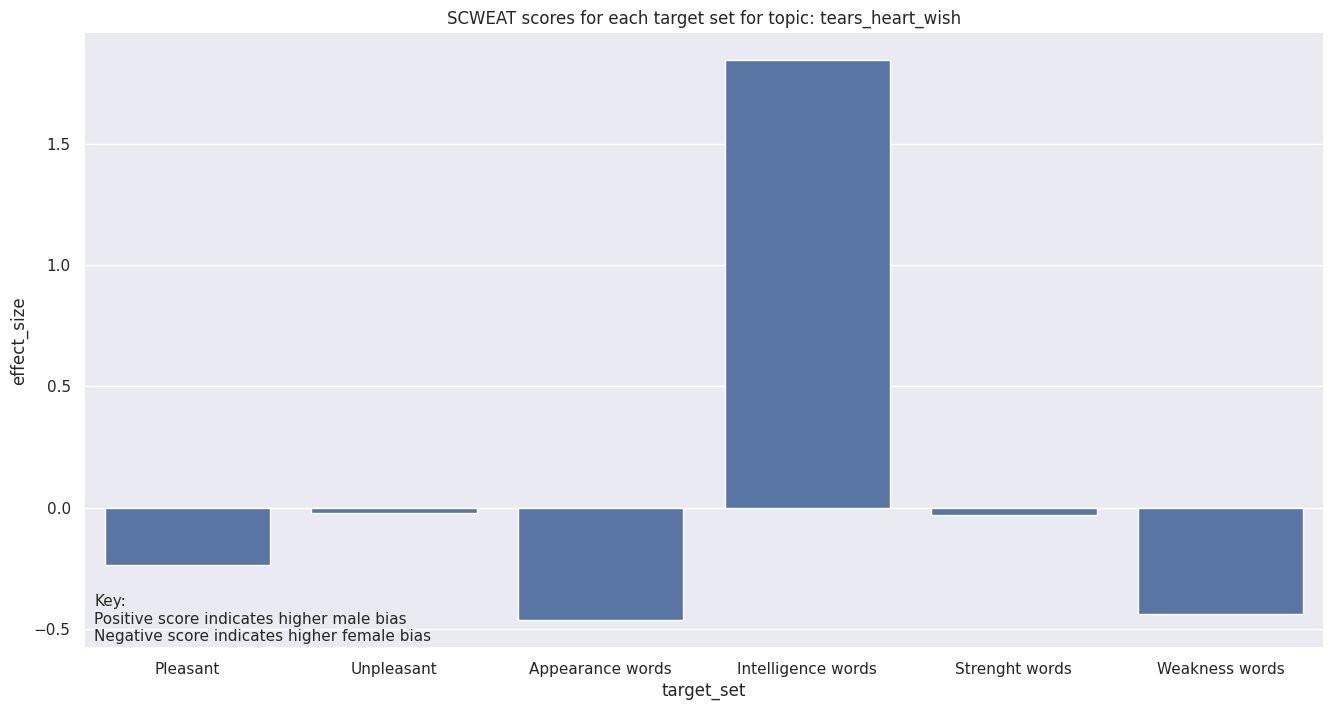

In [ ]:
# overall:	tears_heart_wish => include plot

thw = weat_results[(weat_results['genre'].isna()) & (weat_results['topic'] == 'tears_heart_wish')]
thw_bar_chart = thw[['target_set', 'effect_size']]
thw_bar_chart.set_index('target_set')

for index, row in thw.iterrows():
  print("Target Set:", row['target_set'])
  print("Effect Size:", row['effect_size'])
  print("Word Scores:", row['word_scores'])
  print("------------------\n\n")

# thw_bar_chart.plot(kind='bar')
# plt.title("Target set SCWEAT scores for topic: tears_heart_wish")
# plt.xlabel('target_set')
# plt.ylabel('effect_size')
# # plt.xticks(ticks = [12,13,14,15,16,17], labels = thw_bar_chart['target_set'])
# plt.show()

sns.barplot(data=thw_bar_chart, x='target_set', y='effect_size').set_title("SCWEAT scores for each target set for topic: tears_heart_wish")
plt.text(-0.45, -0.55, "Key:\nPositive score indicates higher male bias\nNegative score indicates higher female bias", fontsize=11)

Probably the only (genre, topic) pair that has all target sets with negative effect sizes - Intelligence words is supposed to be -inf (we only have one entry so stddev is 0 and hence leads to div by 0 while trying to calculate effect size)


### Analysis of individual word scores

What kind of bias do individual words like "love", "strength", "weakness", etc. have?

In [ ]:
def analyse_word_score(word):
  word_scores = weat_results['word_scores'].values
  scores_avg = []

  for word_score_list in word_scores:
    wsl = ast.literal_eval(word_score_list)
    for item in wsl:
      if item['target_word'] == word:
        scores_avg.append(item['scweat_score'])

  return np.mean(scores_avg)

In [ ]:
# print("Average Scores of Individual Words")

interesting_words = ['love', 'strong', 'weak', 'weakness', 'leader', 'follow', 'failure', 'family', 'ugly', 'thin', 'beautiful', 'athletic', 'fat', 'brilliant', 'smart', 'genius']

word_scores = []
for word in interesting_words:
  word_scores.append({
      'word': word,
      'avg_scweat_score': analyse_word_score(word)
  })
  # print("Word:", word)
  # print("Average SCWEAT score:", analyse_word_score(word))
  # print("\n")

word_scores = pd.DataFrame(word_scores)
word_scores.head(8)

,word,avg_scweat_score
0,love,-0.103084
1,strong,0.020385
2,weak,-0.006445
3,weakness,-0.033169
4,leader,0.087075
5,follow,-0.062007
6,failure,0.018056
7,family,-0.035205


In [ ]:
word_scores.loc[[8,9,10,11,12,13,14,15]]

,word,avg_scweat_score
8,ugly,-0.011416
9,thin,-0.015605
10,beautiful,-0.024903
11,athletic,0.070175
12,fat,-0.039473
13,brilliant,0.035830
14,smart,0.040370
15,genius,0.064355
